In [275]:
# import pandas as pd
import seaborn as sns 
# import numpy as np
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import * 
from sklearn.model_selection import train_test_split

In [276]:
data = pd.read_csv("./datasets/CreditScoring.csv")

In [278]:
data.head()
data.nunique()
data["VALUE"].unique()

array([39025., 68400., 16700., ..., 92924., 91861., 88934.])

In [254]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [255]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [256]:
data.columns
(data.isnull().sum() / 5960)*100
data

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [257]:
# data = data.drop(list(data.columns[(data.isnull().sum() / 5960)*100 > 21]) , axis=1)
data=data.replace(np.nan, 0)
print(data)
data['REASON'] = data['REASON'].replace(0,'')
data['JOB'] = data['JOB'].replace(0,'')
data

      BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0       1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1       1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2       1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3       1   1500      0.0       0.0        0       0   0.0    0.0     0.0   
4       0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ...    ...      ...       ...      ...     ...   ...    ...     ...   
5955    0  88900  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956    0  89000  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957    0  89200  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958    0  89800  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959    0  89900  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
0      94.366667   1.0   9.0   0.

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,0.000000
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,0.000000
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,0.000000
3,1,1500,0.0,0.0,,,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [258]:
np.var(data["LOAN"])

125586542.1870073

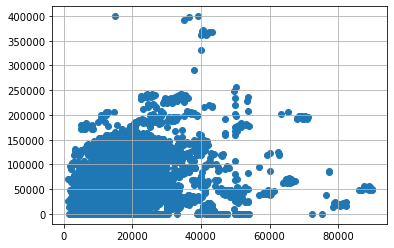

In [259]:
import matplotlib.pyplot as plt 

plt.grid()
plt.scatter(data["LOAN"],data["MORTDUE"])

In [260]:
corelation = data.corr()

<AxesSubplot:>

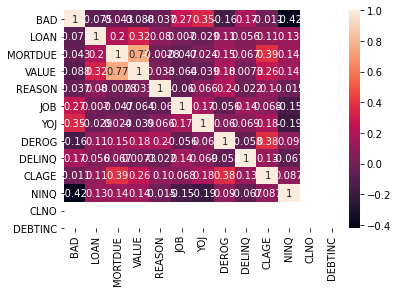

In [261]:
sns.heatmap(corelation , xticklabels=data.columns , yticklabels=data.columns , annot=True)

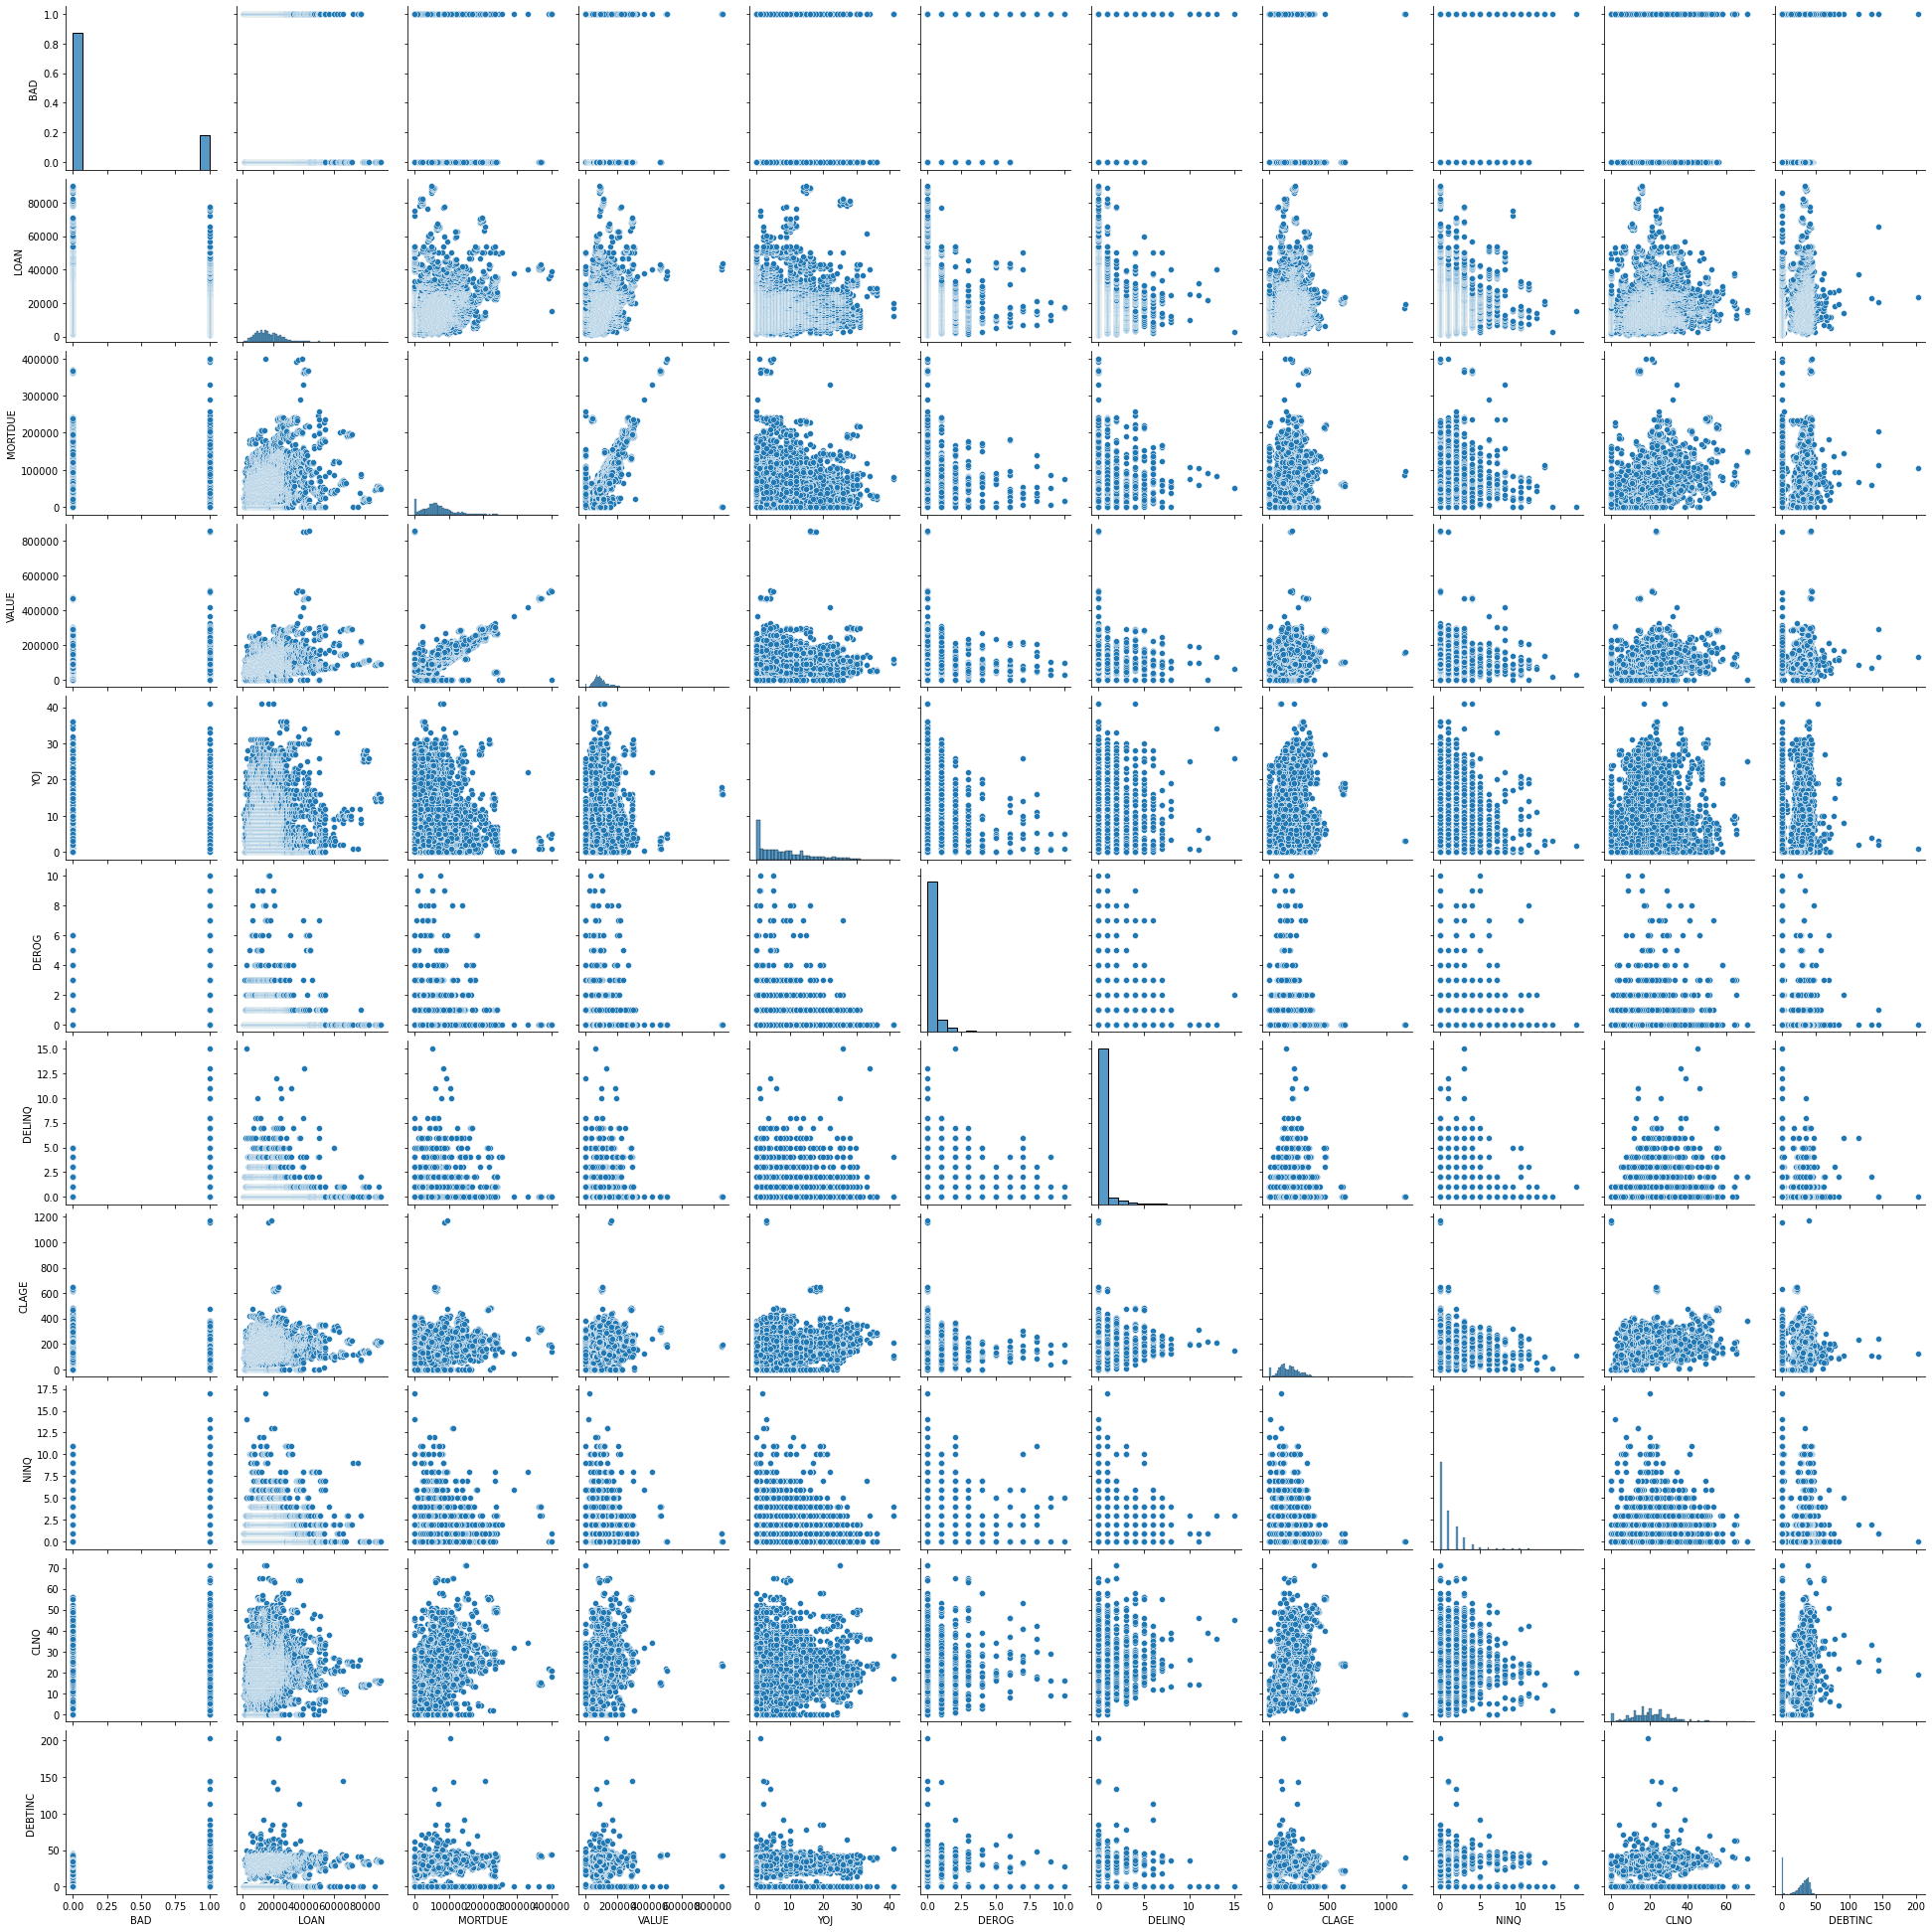

In [262]:
sns.pairplot(data)

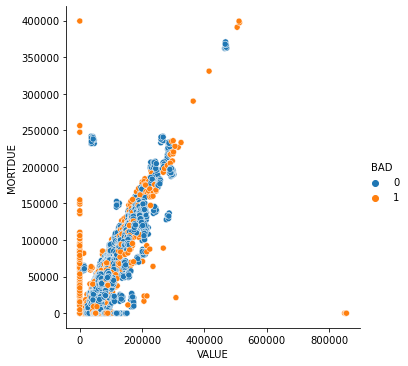

In [263]:
sns.relplot(x='VALUE' ,y="MORTDUE", hue="BAD" ,data=data)

In [264]:
data["BAD"].value_counts()
data.select_dtypes(include=['float']).columns

Index(['MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO',
       'DEBTINC'],
      dtype='object')

In [265]:
from sklearn.feature_selection import VarianceThreshold
Filtre = VarianceThreshold(threshold=0.2)
Donnes_filtrees = Filtre.fit_transform(data[data.select_dtypes(include=['float']).columns])
print(np.array(data))
print(Donnes_filtrees)
print(np.var(data,axis=0))

from sklearn.feature_selection import VarianceThreshold

def trouver_donnees_importantes(X_train,TR):
    Filtre=VarianceThreshold(threshold=TR)
    Donnees_filtrees=Filtre.fit_transform(X_train)
    FS=list(Filtre.get_support())
    X=[]
    for i in range(0,len(FS)):
        if FS[i]==True:
            X += [i]
    return tuple(X)   



[[1 1100 25860.0 ... 1.0 9.0 0.0]
 [1 1300 70053.0 ... 0.0 14.0 0.0]
 [1 1500 13500.0 ... 1.0 10.0 0.0]
 ...
 [0 89200 54045.0 ... 0.0 15.0 35.55659049]
 [0 89800 50370.0 ... 0.0 16.0 34.340882368]
 [0 89900 48811.0 ... 0.0 16.0 34.571519125]]
[[2.58600000e+04 3.90250000e+04 1.05000000e+01 ... 1.00000000e+00
  9.00000000e+00 0.00000000e+00]
 [7.00530000e+04 6.84000000e+04 7.00000000e+00 ... 0.00000000e+00
  1.40000000e+01 0.00000000e+00]
 [1.35000000e+04 1.67000000e+04 4.00000000e+00 ... 1.00000000e+00
  1.00000000e+01 0.00000000e+00]
 ...
 [5.40450000e+04 9.29240000e+04 1.50000000e+01 ... 0.00000000e+00
  1.50000000e+01 3.55565905e+01]
 [5.03700000e+04 9.18610000e+04 1.40000000e+01 ... 0.00000000e+00
  1.60000000e+01 3.43408824e+01]
 [4.88110000e+04 8.89340000e+04 1.50000000e+01 ... 0.00000000e+00
  1.60000000e+01 3.45715191e+01]]
BAD        1.596977e-01
LOAN       1.255865e+08
MORTDUE    2.236131e+09
VALUE      3.421686e+09
YOJ        5.868308e+01
DEROG      6.374282e-01
DELINQ     1

In [266]:
#preprocessing of data ::::::::::::::::::::::::::::::::::::::::::::::::::::
#using one hot encoder for categorical data
print(data)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

REASONvalues=np.array(data.iloc[:,4])
JOBvalues=np.array(data.iloc[:,5])
REASONvalues

# integer encode REASON
label_encoder_REASON = LabelEncoder()
integer_encoded_REASON = label_encoder_REASON.fit_transform(REASONvalues)
print(integer_encoded_REASON)

# integer encode JOB
label_encoder_JOB = LabelEncoder()
integer_encoded_JOB = label_encoder_JOB.fit_transform(JOBvalues)
print(integer_encoded_JOB)

#replacing categorical data with integer values calculated
data.iloc[:,4]=integer_encoded_REASON
data.iloc[:,5]=integer_encoded_JOB

X = data.iloc[:,1:13]; Y = data.iloc[:,0] ; Y=Y.astype('int')
print(X)
print(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
trouver_donnees_importantes(X_train,0.001)

      BAD   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0       1   1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1       1   1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2       1   1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3       1   1500      0.0       0.0                    0.0    0.0     0.0   
4       0   1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   
...   ...    ...      ...       ...      ...     ...   ...    ...     ...   
5955    0  88900  57264.0   90185.0  DebtCon   Other  16.0    0.0     0.0   
5956    0  89000  54576.0   92937.0  DebtCon   Other  16.0    0.0     0.0   
5957    0  89200  54045.0   92924.0  DebtCon   Other  15.0    0.0     0.0   
5958    0  89800  50370.0   91861.0  DebtCon   Other  14.0    0.0     0.0   
5959    0  89900  48811.0   88934.0  DebtCon   Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
0      94.366667   1.0   9.0   0.

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)

In [267]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [268]:
chi2_selector = SelectKBest(chi2, k=5)
X_kbest = chi2_selector.fit_transform(X_train, y_train)
print(X_kbest)
chi2_selector.get_support()

[[1.64000000e+04 2.18570000e+04 5.19940000e+04 2.01933333e+02
  0.00000000e+00]
 [5.09000000e+04 5.33340000e+04 6.32980000e+04 1.06688289e+02
  3.73120974e+01]
 [1.10000000e+04 7.75170000e+04 8.62140000e+04 3.52379138e+02
  2.80302142e+01]
 ...
 [8.90000000e+03 0.00000000e+00 4.91470000e+04 1.10509581e+02
  3.71081421e+01]
 [8.70000000e+03 8.74150000e+04 2.01689000e+05 1.39247591e+01
  2.02538639e+01]
 [1.35000000e+04 2.80000000e+04 8.59990000e+04 2.27266667e+02
  0.00000000e+00]]


array([ True,  True,  True, False, False, False, False, False,  True,
       False, False,  True])

In [269]:
from sklearn.feature_selection import SelectFromModel 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#creating the models
model1=KNeighborsClassifier()
model2=DecisionTreeClassifier()
model3=LogisticRegression(C=10e+10)

#creating the selectors
selector=SelectFromModel(model2, threshold='mean')
selector.fit_transform(X_train,y_train); print(selector.get_support())

selector=SelectFromModel(model3, threshold='mean')
selector.fit_transform(X_train,y_train); print(selector.get_support())

[False False  True False False False False False  True False False  True]
[False False False False False False False  True False  True  True  True]


In [270]:
#models
clf_gini = DecisionTreeClassifier(criterion = "gini") 
clf_gini.fit(X_train, y_train)

clf_entropy = DecisionTreeClassifier(criterion = "entropy") 
clf_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy')

In [271]:
#prediction and evaluation of the model
print("Results Using Gini Index:") 
y_pred_gini = clf_gini.predict(X_test) 
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred_gini)) 
#print(X_test,y_test,y_pred_gini)
print ("Accuracy : ",accuracy_score(y_test,y_pred_gini)*100)

print("")

print("Results Using Entropy:") 
y_pred_entropy = clf_entropy.predict(X_test) 
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred_entropy))      
print ("Accuracy : ",accuracy_score(y_test,y_pred_entropy)*100)

Results Using Gini Index:
Confusion Matrix:  [[881  73]
 [ 90 148]]
Accuracy :  86.3255033557047

Results Using Entropy:
Confusion Matrix:  [[886  68]
 [ 75 163]]
Accuracy :  88.00335570469798


In [272]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [273]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import os
# os.environ\["PATH"\] += os.pathsep + 'C:/Users/tstusr/AppData/Local/Continuum/anaconda3/pkgs/Graphviz2.38/bin'

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [ ]:
dot_data = StringIO()

feature_names=original_data.columns[1:]
#print(feature_names)
class_names=['0','1']
export_graphviz(clf_gini, out_file=dot_data,filled=True, 
                rounded=True,special_characters=True,
                feature_names=feature_names ,  
                class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
svg_graph = graph.create_svg()
svg = open('gini_tree.svg', 'wb')
svg.write(svg_graph)
svg.close()
Image(graph.create_png())

In [274]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,filled=True, 
                rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
svg_graph = graph.create_svg()
svg = open('gini_tree.svg', 'wb')
svg.write(svg_graph)
svg.close()
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [250]:
!pip install graphviz